/Users/r/Library/Caches/pypoetry/virtualenvs/chargpt-cZq5HGVX-py3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


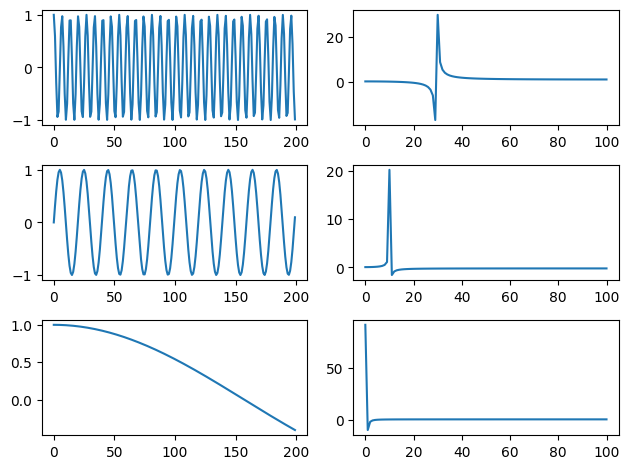

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import torch

pos = torch.arange(200)

cos_sinusoid = torch.cos(pos/10000**(1/128))
sin_sinusoid = torch.sin(pos/10000**(16/128))
cos_sinusoid1 = torch.cos(pos/10000**(64/128))

cos_sinusoid_fft = torch.fft.rfft(cos_sinusoid)
sin_sinusoid_fft = torch.fft.rfft(sin_sinusoid)
cos_sinusoid1_fft = torch.fft.rfft(cos_sinusoid1)

fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(cos_sinusoid.numpy())
axs[1, 0].plot(sin_sinusoid.numpy())
axs[2, 0].plot(cos_sinusoid1.numpy())

axs[0, 1].plot(cos_sinusoid_fft.numpy())
axs[1, 1].plot(sin_sinusoid_fft.numpy())
axs[2, 1].plot(cos_sinusoid1_fft.numpy())


fig.tight_layout()

plt.show()

In [2]:
context_size = 12
embed_size = 3
torch.ones(context_size, embed_size)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [3]:
import os

project_base_dir = os.getcwd()
project_base_dir

'/Users/r/Documents/03 Projects/chargpt/chargpt'

In [8]:
from chargpt.model import TransformerMultiBlockLanguageModel
from chargpt.dataset import BasicShakespeareDataset
from chargpt.tokenizer import IndexTokenizer
from pathlib import Path
from omegaconf import OmegaConf

torch.manual_seed(42)
checkpoint_dir = Path(os.path.join(project_base_dir,
                                   "multirun/2023-08-21/16-51-53/0"))

config = OmegaConf.load(checkpoint_dir / ".hydra" / "config.yaml")
# device = available_device() if config["device"] == "available" else config[
#     "device"]
device = torch.device("cpu")
tok = IndexTokenizer()
data_filename = os.path.join(
    project_base_dir, f"{config['data']['data_dir']}/"
                      f"{config['data']['data_filename']}"
)

dataset = BasicShakespeareDataset(
    filename=data_filename,
    tokenizer=tok,
    device=device,
    context_size=config["context_size"],
    **config["data"],
)

model = TransformerMultiBlockLanguageModel(
    vocab_size=tok.vocab_size,
    context_size=config["context_size"],
    **config["model"],
)

checkpoint = torch.load(
    checkpoint_dir / "checkpoints" / "final.pt"
)
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device=device)


Vocab size: 65


/Users/r/Documents/03 Projects/chargpt/chargpt/dataset.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_data = torch.tensor(


TransformerMultiBlockLanguageModel(
  (token_embedding): Embedding(65, 256)
  (position_embedding): Embedding(128, 256)
  (transformer_blocks): Sequential(
    (0): TransformerBlock(
      (attention_head): MultiHeadAttention(
        (heads): ModuleList(
          (0-3): 4 x AttentionHead(
            (query): Linear(in_features=256, out_features=64, bias=False)
            (key): Linear(in_features=256, out_features=64, bias=False)
            (value): Linear(in_features=256, out_features=64, bias=False)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (out_layer): Linear(in_features=256, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (attention_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (feedforward): FeedforwardNet(
        (net): Sequential(
          (0): Linear(in_features=256, out_features=1024, bias=True)
          (1): ReLU()
          (2): Linear(in_features=1024, out_featu

In [9]:
print(model.position_embedding.weight.shape)

torch.Size([128, 256])


/Users/r/Library/Caches/pypoetry/virtualenvs/chargpt-cZq5HGVX-py3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


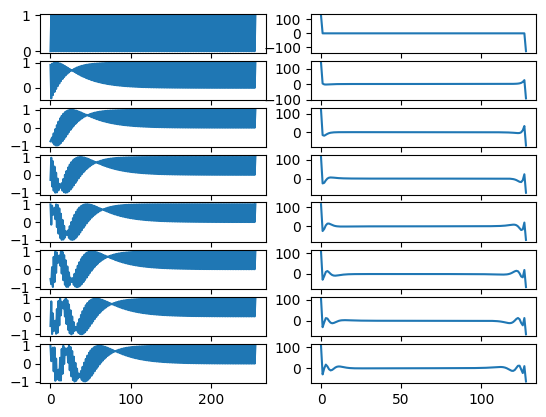

In [10]:
fig_a, axs_a = plt.subplots(8, 2)

# fig_b, axs_b = plt.subplots(8, 2)

for i in range(8):
    axs_a[i,0].plot(model.position_embedding.weight[i*2].detach().numpy())
    axs_a[i, 1].plot(torch.fft.rfft(model.position_embedding.weight[i*2].detach()).numpy())

fig.tight_layout()

plt.show()

In [ ]:
plt.plot(torch.fft.rfft(model.position_embedding.weight[0].detach()).numpy())